<a href="https://colab.research.google.com/github/AAndreevich/master/blob/master/HW2_L2_regular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [ ]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def eval_model_reg2(X, y, lambda_=1e-8, min_alpha=1e-2, max_alpha=7e-2, step_alpha=1e-3, min_iteration=100, max_iteration=5000, step_iteration=100, stoper = 1e-3):
    alpha_list = np.arange(min_alpha, max_alpha+step_alpha, step_alpha)
    iteration_list = np.arange(min_iteration, max_iteration+step_iteration, step_iteration)
    for iteration in iteration_list:
        for alpha in alpha_list:
#             X_st = calc_std_fit(X)
            np.random.seed(42)
            W = np.random.randn(X.shape[0])
            n = X.shape[1]
            err_list = [0]
            step_count = 0
            for step in range(iteration):
                y_pred = np.dot(W, X)
                err = calc_mse(y, y_pred)
                step_count += 1
                W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W**2)
                if step % (iteration / 100) == 0:
                    err_list.append(err)
                if np.abs((err_list[-1] - err_list[-2])) < stoper:
                    break
                elif alpha == alpha_list[-1] and step_count == iteration_list[-1]:
                    print(iteration_list, alpha, 'I can not find optimal solve, change quantity iteration or learning rate')
                    break
            if np.abs((err_list[-1] - err_list[-2])) < stoper:
                break
        if np.abs((err_list[-1] - err_list[-2])) < stoper:
            break
    return n, iteration, W, err_list[1:], round(alpha, 3), np.abs((err_list[-1] - err_list[-2]))

In [ ]:
X = calc_std_fit(X)

In [ ]:
n, iterations, Width, mse, learning_rate, q = eval_model_reg2(X, y, min_alpha=1e-2, max_alpha=7e-2, \
                                                              step_alpha=1e-2, min_iteration=100, \
                                                              max_iteration=1000, step_iteration=10, \
                                                              stoper = 1e-3)

Number of objects = 10        
Learning rate = 0.07        
Count iteration = 200        
Initial weights = [-27.12926447 -27.45654571  10.71973401 -26.06226162] 



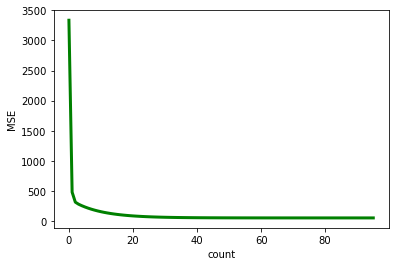

In [ ]:
print(f'Number of objects = {n} \
       \nLearning rate = {learning_rate} \
       \nCount iteration = {iterations} \
       \nInitial weights = {Width} \n')

plt.plot(mse, 'g', linewidth=3)
plt.ylabel('MSE')
plt.xlabel('count')
plt.show()